## CSV to `GeoDataFrame`

Start with importing packages and updating viewing options

In [17]:
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Display all columns when looking at df's
pd.set_option('display.max.columns', None)

URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

power_plants = power_plants.drop(columns='Unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


Let's use the lat and long columns in the CSV to create a geodataframe.
These indicate the location of the power plants in the NAD83 CRS (EPSG:4269).
We can use the `geopandas` function `points_from_xy()`

In [3]:
# Create points
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)
points

<GeometryArray>
[ <POINT (-160.497 55.34)>,  <POINT (-87.357 33.459)>,
   <POINT (-88.01 31.007)>,  <POINT (-86.283 32.584)>,
 <POINT (-106.375 31.757)>,  <POINT (-87.781 32.602)>,
  <POINT (-86.052 33.784)>,   <POINT (-87.45 33.255)>,
  <POINT (-86.255 32.619)>,  <POINT (-86.338 33.426)>,
 ...
  <POINT (-80.124 35.396)>,   <POINT (-77.898 35.36)>,
  <POINT (-78.077 35.299)>,  <POINT (-78.077 35.299)>,
  <POINT (-80.652 35.556)>,   <POINT (-82.376 35.38)>,
  <POINT (-79.368 36.009)>,  <POINT (-79.736 35.273)>,
   <POINT (-73.91 42.877)>,  <POINT (-77.276 41.838)>]
Length: 12009, dtype: geometry

In [4]:
# Create a Geodataframe

power_plants = gpd.GeoDataFrame(power_plants,  # data frame
                                geometry=points,  # specify geometry column
                                crs = 'EPSG: 4269') # specify CRS
power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)


In [5]:
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

In [6]:
print('CRS: ', power_plants.crs)
print('is CRS geographic?: ', power_plants.crs.is_geographic)

CRS:  EPSG: 4269
is CRS geographic?:  True


<Axes: >

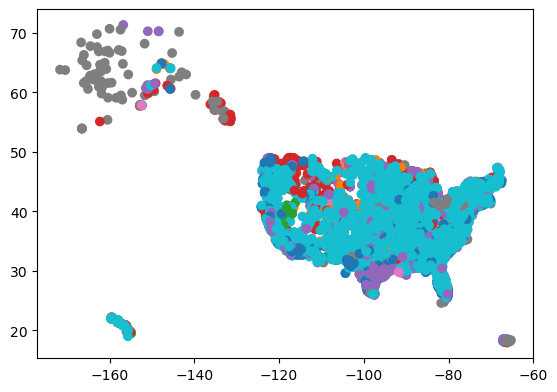

In [10]:
power_plants.plot(column = 'primsource')

In [8]:
fp = os.path.join('data', 'tl_2023_us_state.shp')
fp

'data/tl_2023_us_state.shp'

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


<Axes: >

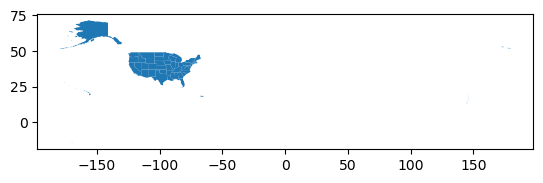

In [9]:
states = gpd.read_file(fp)
states.plot()

## f-strings

So far we have printed variables using string concatenation inside the `print()` function; use commas to separate every string we want to print.

In [12]:
print('CRS: ', power_plants.crs)

CRS:  EPSG: 4269


Another popular way of mixing strings and variables in print statements is by creating an f-string which stands for “formatted string”. The simplest syntax for an f-string is:

```python
f" some text {replace}"
```

where replace can be a variable, an expression, or a function or method call. For example:

In [14]:
# Explore CRS
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


We just created a string replacing the value inside the curly brackets {}.

One of the advantages of using f-strings is that they offer customization for formatting the output:

In [15]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


# Import shapefile
Let’s import the TIGER shapefile

In [22]:
# Import states data
fp = os.path.join('/',
                 'courses',
                 'EDS220',
                 'data',
                 'tl_2022_us_state',
                 'tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


EPSG:4269


<Axes: >

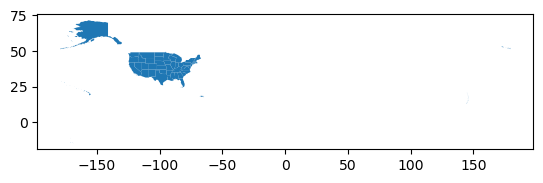

In [23]:
print(states.crs)
states.plot()

# `for` loops!

It can be easier to work with the codes as numbers instead of strings, let's update the corresponding columns in the geo-dataframe: `region`, `division`, and `statefp` columns:

In [25]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This is inconvenient because it repeats the same piece of code, only changing the column name. Instead, using a `for` loop allows us to succinctly print the same output.

In [26]:
code_cols = ['region', 'division', 'statefp']

# check whether codes columns are strings
for column in code_cols: 
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops execute a block of code a fixed number of times, iterating over a set of objects. In this case we iterate over a list of column names. 

** DRY CODE **

DRY= don't repeat yourself is a code programming principle that encourges reducing redundancy and consolidating repeated logic. If you need to repeat the "same" code more than twice, you probably need a `for` loop. 

Next, update the data type of the code columns to be integers. 
This time, we are going to verify the data type of the column using the function `is_numeric_dtype()` and `assert` statement:

In [28]:
# Update code columns into integers:
for column in code_cols:
    states[column]=states[column].astype('int')
    assert is_numeric_dtype(states[column]) # check conversion

The `assert` keyword does nothing if the expression next to it evaluates to `True`. 
If the expression evaluates to `false` then `assert` raises an `AssertionError` and stops your code from running. 
Example:

In [32]:
# Does nothing if statement is True. 
assert 2 + 2 == 4

In [34]:
# Raises an error if the statement is False. 
assert 2 + 2 == 5

AssertionError: 

## Data Selection

For this lesson, we want to use only the contiguous states. The `states` geodataframe covers a bigger extent. 

<Axes: >

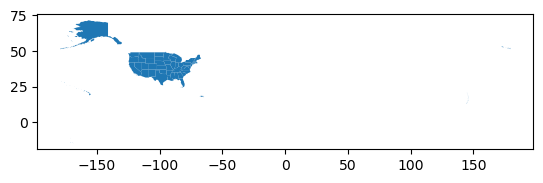

In [35]:
states.plot()

## Check-in

- what are the unique values for region, division, or state codes in the data?
- which codes should we select to keep only states in the contiguous US?

In [37]:
states.region.unique()

array([3, 2, 1, 4, 9])

Hawaii and Alaska have codes 2 and 15 respectively, and region 9 includes PR and other islands, should be excluded.

In [57]:
contiguous = states[ (states.region != 9) & (~states.statefp.isin([2, 15]))]

<Axes: >

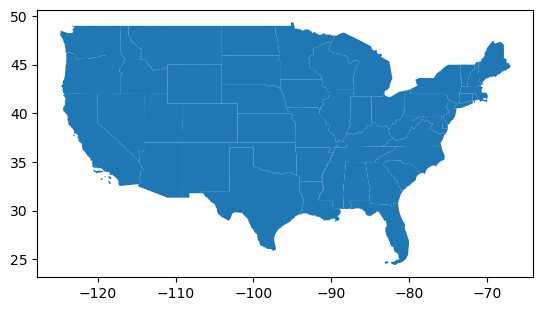

In [58]:
contiguous.plot()

Select the data in the `power_plants` data frame for the contiguous US states.

In [62]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

# Plotting

before we plot our data, ensure they are in the same CRS:

In [63]:
contiguous.crs == power_plants.crs

True

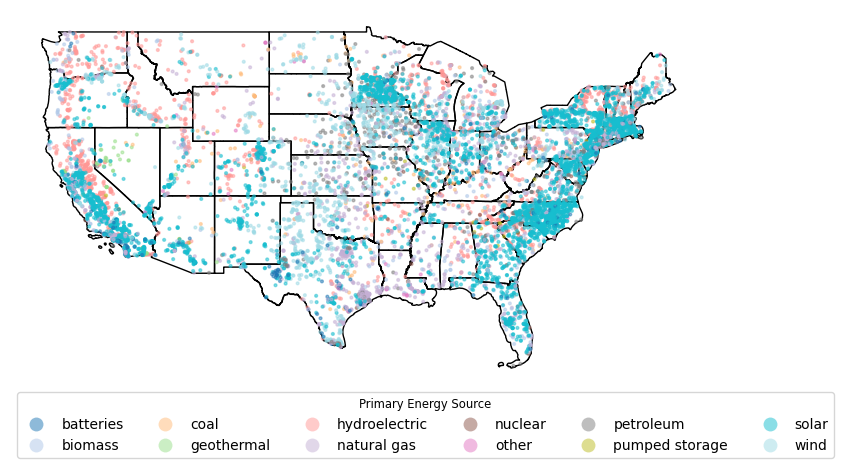

In [83]:
fig, ax = plt.subplots(figsize = (9,5))

# remove axis for the map
ax.axis('off')

contiguous.plot(ax=ax,
                color = 'none',
                edgecolor = 'black')

# add power plants colored by energy source

power_plants.plot(ax=ax,
                  column = 'primsource',
                  legend = True,
                  markersize = 4,
                  cmap = 'tab20',
                  alpha = 0.5,
                  legend_kwds = {
                      'title':'Primary Energy Source',
                      'title_fontsize':'small',
                      'ncol' : 6,
                      'loc':'upper left',
                      'bbox_to_anchor':(0,0)
                  }
                 )


plt.show()

We controlled the legend location using `loc` and `bbox_to_anchor` in the `legend_kwds`:
- `loc` indicates the corner of the legend that we want to use for placement.
- `bbox_to_anchor` is a tuple with coordinates indicating where we want to place the corner specified in `loc` relative to the axes. Values between 0 and 1 are within the axes. 